# NeuroCare SIP Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv("updated_condition_dataset.csv")

In [3]:
df.shape

(39998, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TLC             39998 non-null  int64  
 1   Lymphocytes(%)  39998 non-null  int64  
 2   Polymorphs(%)   39998 non-null  int64  
 3   Protein         39998 non-null  float64
 4   Sugar           39998 non-null  float64
 5   Condition       39998 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [5]:
df.head()

,TLC,Lymphocytes(%),Polymorphs(%),Protein,Sugar,Condition
0,2,100,2,33.0,60.0,Abnormal
1,1,8,9,8.0,81.0,Normal
2,75,75,19,104.0,34.0,Abnormal
3,3,3,8,7.0,79.0,Normal
4,4,10,3,6.0,93.0,Normal


In [6]:
df.duplicated().sum()

2352

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(37646, 6)

In [9]:
df['Condition'].value_counts()

Condition
Abnormal    22284
Normal      15362
Name: count, dtype: int64

### Train-Test Split

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Normal → 1, Abnormal → 0
le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])  

X = df.drop("Condition", axis=1)
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model Training

## Random Forest Model

📊 Classification Report:

              precision    recall  f1-score   support

      Normal    0.99955   0.99888   0.99922      4473
    Abnormal    0.99837   0.99935   0.99886      3057

    accuracy                        0.99907      7530
   macro avg    0.99896   0.99911   0.99904      7530
weighted avg    0.99907   0.99907   0.99907      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


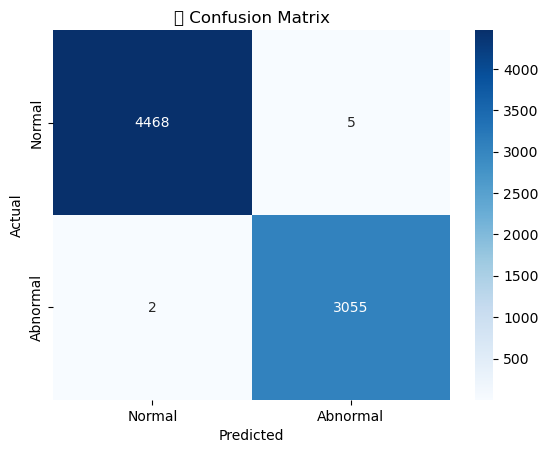

✅ Model saved as rf_csf_model.pkl


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Normal → 1, Abnormal → 0
le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])  

X = df.drop("Condition", axis=1)
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, y_pred)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(model, "rf_csf_model.pkl")
print("✅ Model saved as rf_csf_model.pkl")

In [12]:
df['Condition'].value_counts()

Condition
0    22284
1    15362
Name: count, dtype: int64


📊 Classification Report (Loaded Model):
              precision    recall  f1-score   support

      Normal    0.99955   0.99888   0.99922      4473
    Abnormal    0.99837   0.99935   0.99886      3057

    accuracy                        0.99907      7530
   macro avg    0.99896   0.99911   0.99904      7530
weighted avg    0.99907   0.99907   0.99907      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


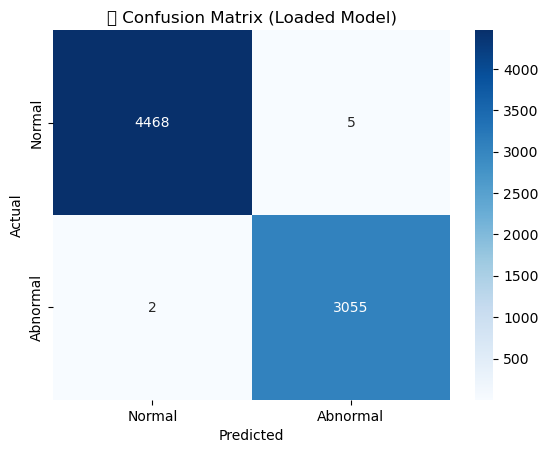

In [13]:
rf_loaded_model = joblib.load("rf_csf_model.pkl")

y_pred_loaded = rf_loaded_model.predict(X_test)

print("\n📊 Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, y_pred_loaded)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix (Loaded Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
print(set(y_train))  # Should print {0, 1}
print(le.classes_)

{0, 1}
[0 1]


📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    1.00000   1.00000   1.00000       100
      Normal    1.00000   1.00000   1.00000        50

    accuracy                        1.00000       150
   macro avg    1.00000   1.00000   1.00000       150
weighted avg    1.00000   1.00000   1.00000       150



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


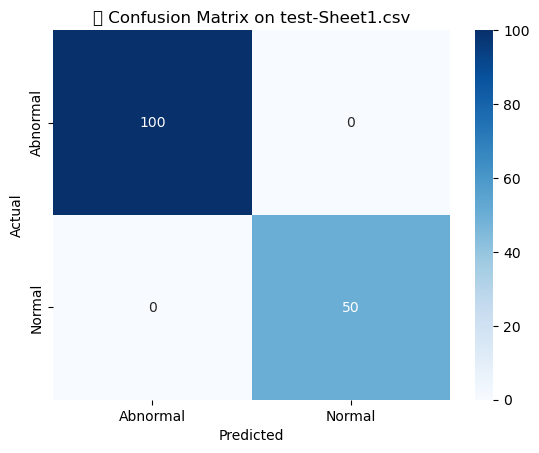

In [15]:
test_df = pd.read_csv("firstData.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (LabelEncoder: 'Abnormal'→0, 'Normal'→1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]

for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test = test_df[features]
y_true = test_df["Condition_Encoded"]
y_pred = rf_loaded_model.predict(X_test)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
print(test_df["Condition"].unique())
print(test_df["Condition_Encoded"].unique())

['Normal' 'Abnormal']
[1 0]


In [17]:
print(set(y_train))  # Should print {0, 1}
print(le.classes_)   # Will show the label order used by LabelEncoder

{0, 1}
[0 1]


In [18]:
print(test_df["Condition"].unique())
print(test_df["Condition_Encoded"].unique())

['Normal' 'Abnormal']
[1 0]


📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    1.00000   1.00000   1.00000        20
      Normal    1.00000   1.00000   1.00000         5

    accuracy                        1.00000        25
   macro avg    1.00000   1.00000   1.00000        25
weighted avg    1.00000   1.00000   1.00000        25



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


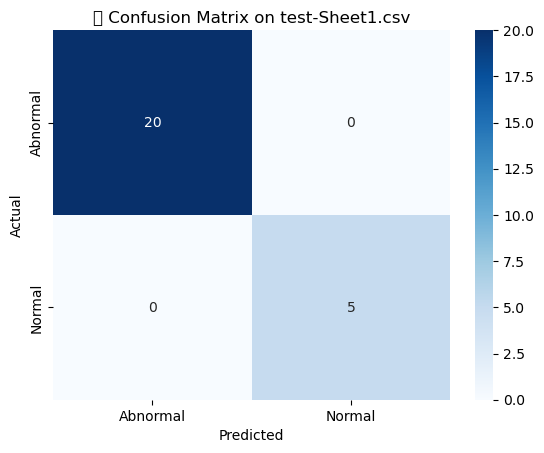

In [19]:
test_df = pd.read_csv("test-Sheet1.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (LabelEncoder: 'Abnormal'→0, 'Normal'→1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]

for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test = test_df[features]
y_true = test_df["Condition_Encoded"]
y_pred = rf_loaded_model.predict(X_test)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
print(set(y_train))  # Should print {0, 1}
print(le.classes_)   # Will show the label order used by LabelEncoder

print(test_df["Condition"].unique())
print(test_df["Condition_Encoded"].unique())


{0, 1}
[0 1]
['Abnormal' 'Normal']
[0 1]


In [21]:
# import numpy as np

# def get_input(feature_name):
#     while True:
#         try:
#             value = float(input(f"Enter {feature_name}: "))
#             if value < 0:
#                 print("❌ Please enter a non-negative integer.")
#                 continue
#             return value
#         except ValueError:
#             print("❌ Invalid input. Please enter an integer.")

# feature_names = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]

# user_values = [get_input(feature) for feature in feature_names]

# input_array = np.array([user_values])

# pred = model.predict(input_array)[0]

# label_map = {0: "Abnormal", 1: "Normal"}
# prediction_label = label_map[pred]

# print("\n🧠 Prediction Result:")
# print(f"🔍 Based on input values, the predicted condition is: {prediction_label}")

## XGBoost Model

C:\Users\SAAKSHI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal    0.99978   0.99821   0.99899      4473
    Abnormal    0.99739   0.99967   0.99853      3057

    accuracy                        0.99880      7530
   macro avg    0.99858   0.99894   0.99876      7530
weighted avg    0.99881   0.99880   0.99880      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


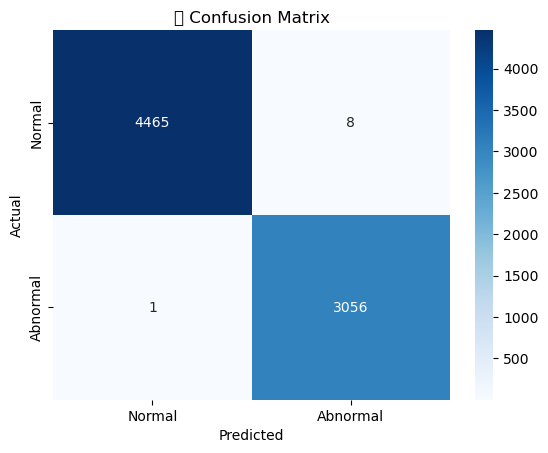

✅ Model saved as xgb_csf_model.pkl


In [22]:
from xgboost import XGBClassifier

le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition']) 

X = df.drop("Condition", axis=1)
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("\n📊 XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, xgb_pred)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(model, "xgb_csf_model.pkl")
print("✅ Model saved as xgb_csf_model.pkl")


📊 Classification Report (Loaded Model):
              precision    recall  f1-score   support

      Normal    0.99955   0.99888   0.99922      4473
    Abnormal    0.99837   0.99935   0.99886      3057

    accuracy                        0.99907      7530
   macro avg    0.99896   0.99911   0.99904      7530
weighted avg    0.99907   0.99907   0.99907      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


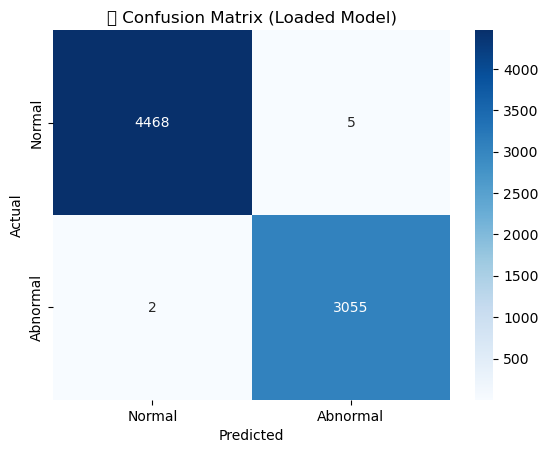

In [23]:
xgb_loaded_model = joblib.load("xgb_csf_model.pkl")

y_pred_loaded = xgb_loaded_model.predict(X_test)

print("\n📊 Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, y_pred_loaded)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix (Loaded Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    1.00000   1.00000   1.00000        20
      Normal    1.00000   1.00000   1.00000         5

    accuracy                        1.00000        25
   macro avg    1.00000   1.00000   1.00000        25
weighted avg    1.00000   1.00000   1.00000        25



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


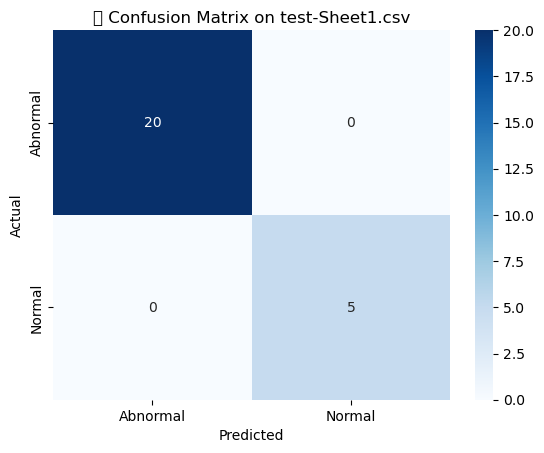

In [24]:
test_df = pd.read_csv("test-Sheet1.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (LabelEncoder: 'Abnormal'→0, 'Normal'→1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]

for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test = test_df[features]
y_true = test_df["Condition_Encoded"]
y_pred = xgb_loaded_model.predict(X_test)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    1.00000   1.00000   1.00000       100
      Normal    1.00000   1.00000   1.00000        50

    accuracy                        1.00000       150
   macro avg    1.00000   1.00000   1.00000       150
weighted avg    1.00000   1.00000   1.00000       150



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


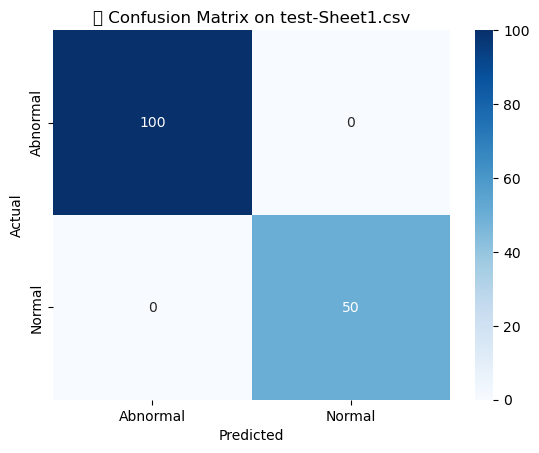

In [25]:
test_df = pd.read_csv("firstData.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (LabelEncoder: 'Abnormal'→0, 'Normal'→1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]

for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test = test_df[features]
y_true = test_df["Condition_Encoded"]
y_pred = xgb_loaded_model.predict(X_test)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVM Model


📊 SVM Classification Report:
              precision    recall  f1-score   support

      Normal    0.99431   0.97697   0.98557      4473
    Abnormal    0.96715   0.99182   0.97933      3057

    accuracy                        0.98300      7530
   macro avg    0.98073   0.98440   0.98245      7530
weighted avg    0.98328   0.98300   0.98303      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


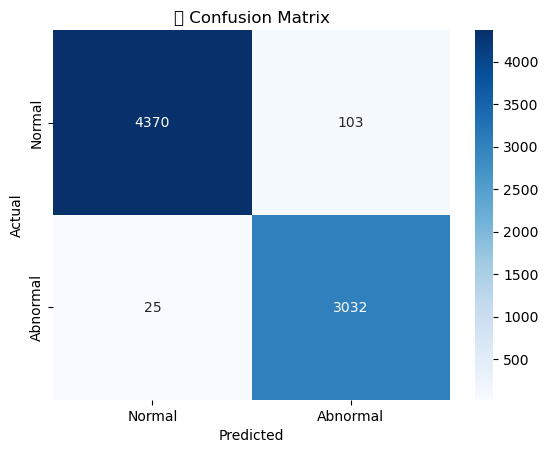

✅ Model saved as svm_csf_model.pkl


In [26]:
from sklearn.svm import SVC

df['Condition'] = le.fit_transform(df['Condition'])  

X = df.drop("Condition", axis=1)
y = df["Condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# SVM works better with scaled data
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_svm, y_train)

svm_pred = svm_model.predict(X_test_svm)

print("\n📊 SVM Classification Report:")
print(classification_report(y_test, svm_pred, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, svm_pred)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(model, "svm_csf_model.pkl")
print("✅ Model saved as svm_csf_model.pkl")


📊 Classification Report (Loaded Model):
              precision    recall  f1-score   support

      Normal    0.99955   0.99888   0.99922      4473
    Abnormal    0.99837   0.99935   0.99886      3057

    accuracy                        0.99907      7530
   macro avg    0.99896   0.99911   0.99904      7530
weighted avg    0.99907   0.99907   0.99907      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


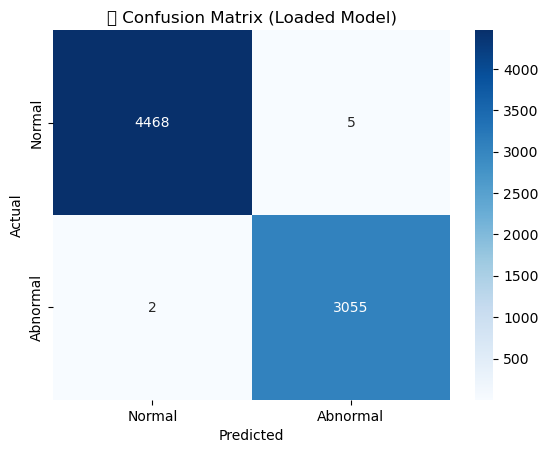

In [27]:
svm_loaded_model = joblib.load("svm_csf_model.pkl")

y_pred_loaded = svm_loaded_model.predict(X_test)

print("\n📊 Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, y_pred_loaded)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix (Loaded Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    0.00000   0.00000   0.00000        20
      Normal    0.20000   1.00000   0.33333         5

    accuracy                        0.20000        25
   macro avg    0.10000   0.50000   0.16667        25
weighted avg    0.04000   0.20000   0.06667        25



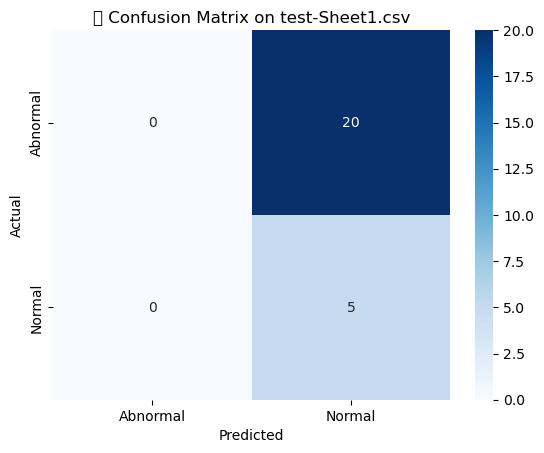

In [28]:
test_df = pd.read_csv("test-Sheet1.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]
for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test_raw = test_df[features]
X_test_scaled = scaler.transform(X_test_raw) 
y_true = test_df["Condition_Encoded"]

y_pred = svm_loaded_model.predict(X_test_scaled)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    0.00000   0.00000   0.00000       100
      Normal    0.33333   1.00000   0.50000        50

    accuracy                        0.33333       150
   macro avg    0.16667   0.50000   0.25000       150
weighted avg    0.11111   0.33333   0.16667       150



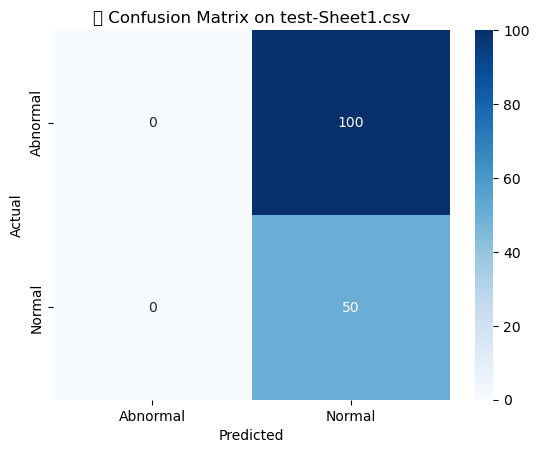

In [29]:
test_df = pd.read_csv("firstData.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (Abnormal → 0, Normal → 1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]
for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test_raw = test_df[features]
X_test_scaled = scaler.transform(X_test_raw)  
y_true = test_df["Condition_Encoded"]

y_pred = svm_loaded_model.predict(X_test_scaled)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression Model


📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal    0.99004   0.97787   0.98392      4473
    Abnormal    0.96819   0.98561   0.97682      3057

    accuracy                        0.98101      7530
   macro avg    0.97911   0.98174   0.98037      7530
weighted avg    0.98117   0.98101   0.98104      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


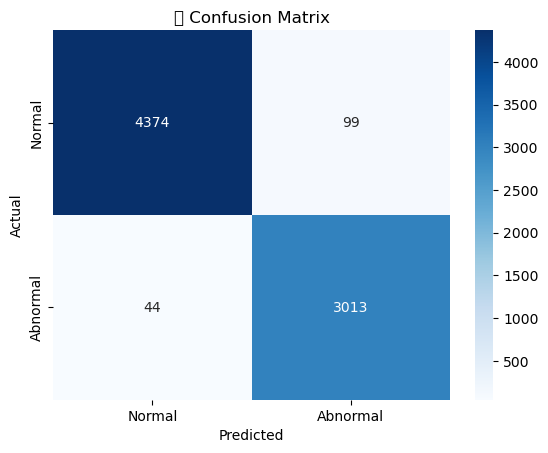

✅ Model saved as lr_csf_model.pkl


In [30]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

lr_model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train_lr, y_train)

lr_pred = lr_model.predict(X_test_lr)

print("\n📊 Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, lr_pred)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(model, "lr_csf_model.pkl")
print("✅ Model saved as lr_csf_model.pkl")


📊 Classification Report (Loaded Model):
              precision    recall  f1-score   support

      Normal    0.99955   0.99888   0.99922      4473
    Abnormal    0.99837   0.99935   0.99886      3057

    accuracy                        0.99907      7530
   macro avg    0.99896   0.99911   0.99904      7530
weighted avg    0.99907   0.99907   0.99907      7530



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


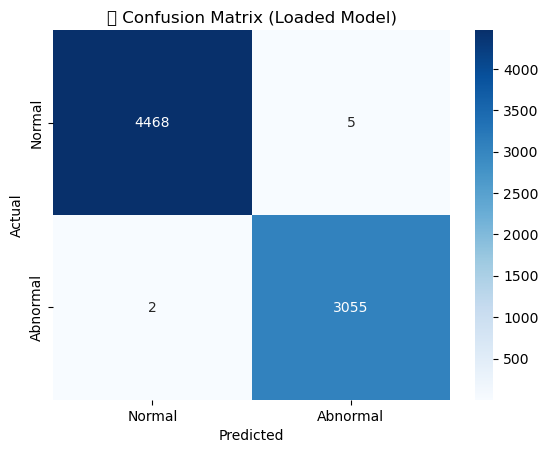

In [31]:
lr_loaded_model = joblib.load("lr_csf_model.pkl")

y_pred_loaded = lr_loaded_model.predict(X_test)

print("\n📊 Classification Report (Loaded Model):")
print(classification_report(y_test, y_pred_loaded, digits=5, target_names=["Normal", "Abnormal"]))

cm = confusion_matrix(y_test, y_pred_loaded)
labels = ["Normal", "Abnormal"]

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("🧾 Confusion Matrix (Loaded Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    0.00000   0.00000   0.00000       100
      Normal    0.33333   1.00000   0.50000        50

    accuracy                        0.33333       150
   macro avg    0.16667   0.50000   0.25000       150
weighted avg    0.11111   0.33333   0.16667       150



C:\Users\SAAKSHI\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


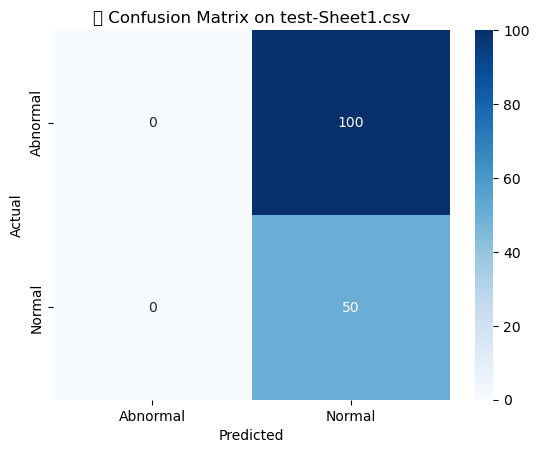

In [32]:
from sklearn.preprocessing import StandardScaler

test_df = pd.read_csv("firstData.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (Abnormal → 0, Normal → 1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]
for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test_raw = test_df[features]
X_test_scaled = scaler.transform(X_test_raw)  
y_true = test_df["Condition_Encoded"]

y_pred = lr_loaded_model.predict(X_test_scaled)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

📊 Classification Report on test-Sheet1.csv:

              precision    recall  f1-score   support

    Abnormal    0.00000   0.00000   0.00000        20
      Normal    0.20000   1.00000   0.33333         5

    accuracy                        0.20000        25
   macro avg    0.10000   0.50000   0.16667        25
weighted avg    0.04000   0.20000   0.06667        25



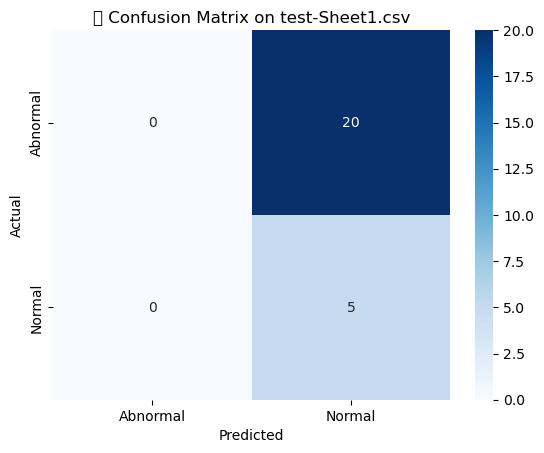

In [33]:
from sklearn.preprocessing import StandardScaler

test_df = pd.read_csv("test-Sheet1.csv")

test_df.columns = test_df.columns.str.strip().str.replace('\t', '')

test_df["Condition"] = test_df["Condition"].apply(lambda x: "Normal" if str(x).strip() == "Normal" else "Abnormal")

# (Abnormal → 0, Normal → 1)
condition_map = {"Abnormal": 0, "Normal": 1}
test_df["Condition_Encoded"] = test_df["Condition"].map(condition_map)

features = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]
for col in features:
    test_df[col] = test_df[col].clip(lower=0).round().astype(int)

X_test_raw = test_df[features]
X_test_scaled = scaler.transform(X_test_raw)  
y_true = test_df["Condition_Encoded"]

y_pred = lr_loaded_model.predict(X_test_scaled)

print("📊 Classification Report on test-Sheet1.csv:\n")
print(classification_report(y_true, y_pred, digits=5, target_names=["Abnormal", "Normal"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Abnormal", "Normal"], yticklabels=["Abnormal", "Normal"])
plt.title("🧾 Confusion Matrix on test-Sheet1.csv")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
def get_input(feature_name):
    while True:
        try:
            value = float(input(f"Enter {feature_name}: "))
            if value < 0:
                print("❌ Please enter a non-negative value.")
                continue
            return value
        except ValueError:
            print("❌ Invalid input. Please enter a number.")

feature_names = ["TLC", "Lymphocytes(%)", "Polymorphs(%)", "Protein", "Sugar"]
user_values = [get_input(f) for f in feature_names]

input_array = np.array([user_values])

pred = rf_loaded_model.predict(input_array)[0]

label_map = {0: "Abnormal", 1: "Normal"}
prediction_label = label_map[pred]

print("\n🧠 Prediction Result:")
print(f"🔍 Based on input values, the predicted condition is: {prediction_label}")

# --- TBM scoring (only if Abnormal) ---
if prediction_label == "Abnormal":
    tlc, lympho, _, protein, sugar = user_values
    tbm_score = 0

    if tlc > 75 and 80 <= lympho <= 85:
        tbm_score += 5

    if 15 <= sugar <= 48:
        tbm_score += 2.5

    if 75 <= protein <= 200:
        tbm_score += 2.5

    # TBM Score interpretation
    interpretation = ""
    if tbm_score == 0:
        interpretation = "No TBM, Kindly correlate clinically"
    elif tbm_score == 2.5:
        interpretation = "Kindly correlate clinically"
    elif tbm_score == 5:
        interpretation = "Possible TBM, Kindly correlate clinically"
    elif tbm_score == 7.5:
        interpretation = "Probable TBM, Kindly correlate clinically"
    elif tbm_score == 10:
        interpretation = "Definite TBM, Kindly correlate clinically"

    print("\n🧪 TBM Evaluation:")
    print(f"🧾 TBM Score: {tbm_score}")
    print(f"📌 Interpretation: {interpretation}")
else:
    print("\n✅ No TBM scoring needed for Normal prediction.")


Enter TLC:  45
Enter Lymphocytes(%):  67
Enter Polymorphs(%):  34
Enter Protein:  56
Enter Sugar:  90



🧠 Prediction Result:
🔍 Based on input values, the predicted condition is: Abnormal

🧪 TBM Evaluation:
🧾 TBM Score: 0
📌 Interpretation: No TBM, Kindly correlate clinically


C:\Users\SAAKSHI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
